In [1]:
import numpy as np
from lib import plot
import IPython
import cv2
import matplotlib.pyplot as plt

paper = plot.A6_PORTRAIT

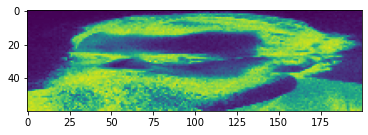

In [2]:
img = cv2.imread('data/boltzmann.jpg')
output_shape = (200, 60)

img = img.dot([0.07, 0.72, 0.21]) / 255

paper_aspect = paper.content_width / paper.content_height
img_aspect = img.shape[1] / img.shape[0]
if img_aspect < paper_aspect:
    new_height = round(img.shape[1] / paper_aspect)
    y_offset = (img.shape[0] - new_height) // 2
    img = img[y_offset:y_offset + new_height, :]
else:
    new_width = round(img.shape[0] * paper_aspect)
    x_offset = (img.shape[1] - new_width) // 2
    img = img[:, x_offset:new_width + x_offset]

img = cv2.resize(img, dsize=output_shape, interpolation=cv2.INTER_CUBIC)

img = img - np.min(img)
img = 1 - img / np.max(img)

plt.imshow(img[:, :])

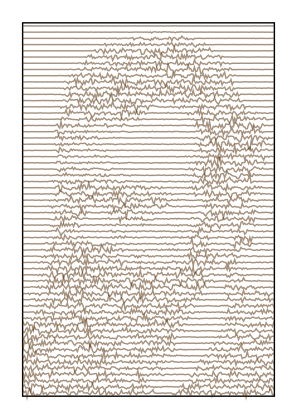

In [3]:
p_svg = plot.SVGPlotter('plots/portrait.svg', paper)
p_hpgl = plot.HPGLPlotter(paper, 'plots/portrait_{index}.hpgl')
plotter = plot.MultiPlotter()
plotter.register_plotter(p_svg)
plotter.register_plotter(p_hpgl)

plotter.move_to(paper.bottom_left())
plotter.line_to(paper.bottom_right())
plotter.line_to(paper.top_right())
plotter.line_to(paper.top_left())
plotter.line_to(paper.bottom_left())

plotter.add_layer([0.3, 0.15, 0, 0.5])

noise_img = np.random.normal(size=img.shape) * img * 0.7

for yi in range(img.shape[0]):
    y = paper.top() + (yi + 0.5) * (paper.content_height / img.shape[0])
    plotter.move_to((paper.left(), y))
    for xi in range(img.shape[1]):
        x = paper.left() + (xi + 0.5) * (paper.content_width / img.shape[1])
        plotter.line_to((x, y + noise_img[yi, xi]))

plotter.finalise()
IPython.display.SVG(filename=p_svg.file_name)